In [1]:
# import library
import pandas as pd
import numpy as np
import re
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
def load_data():
  df = pd.read_excel('datacleanchatgpt.xlsx')
  return df

df = load_data()
df.head()

,label,tweet,lower,hapusangka,normalisasi,token,filter,fulltext
0,Positif,-- Halaman obrolan #ChatGPT @OpenAi tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,"['halaman', 'obrolan', 'chatgpt', 'openai', 't...",halaman obrolan chatgpt openai tidak tercetak ...,halaman obrol chatgpt openai tidak cetak denga...
1,Netral,' Snapchat merilis chatbot AI-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,"['snapchat', 'merilis', 'chatbot', 'ai', 'nya'...",snapchat merilis chatbot ai nya sendiri yang d...,snapchat rilis chatbot ai nya sendiri yang duk...
2,Netral,""" #ChatGPT untuk Guru - Panduan oleh Evan Dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...","['chatgpt', 'untuk', 'guru', 'panduan', 'oleh'...",chatgpt untuk guru panduan oleh evan dunne dar...,chatgpt untuk guru pandu oleh evan dunne dari ...
3,Netral,"""#ChatGPT Risiko dan Perlunya #Kebijakan Perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","['chatgpt', 'risiko', 'dan', 'perlunya', 'kebi...",chatgpt risiko dan perlunya kebijakan perusaha...,chatgpt risiko dan perlu bijak usaha orlylobel
4,Positif,"""#TripGen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","['tripgen', 'dapat', 'memberikan', 'layanan', ...",tripgen dapat memberikan layanan loop tertutup...,tripgen dapat beri layan loop tutup kepada wis...


In [3]:
df = pd.DataFrame(df[['label','fulltext']])

In [4]:
df['label'] = df['label'].astype('category')

In [5]:
df['label'].value_counts()

Netral     3929
Negatif    1844
Positif    1328
Name: label, dtype: int64

Text(0.5, 1.0, 'Dataset labels distribution')

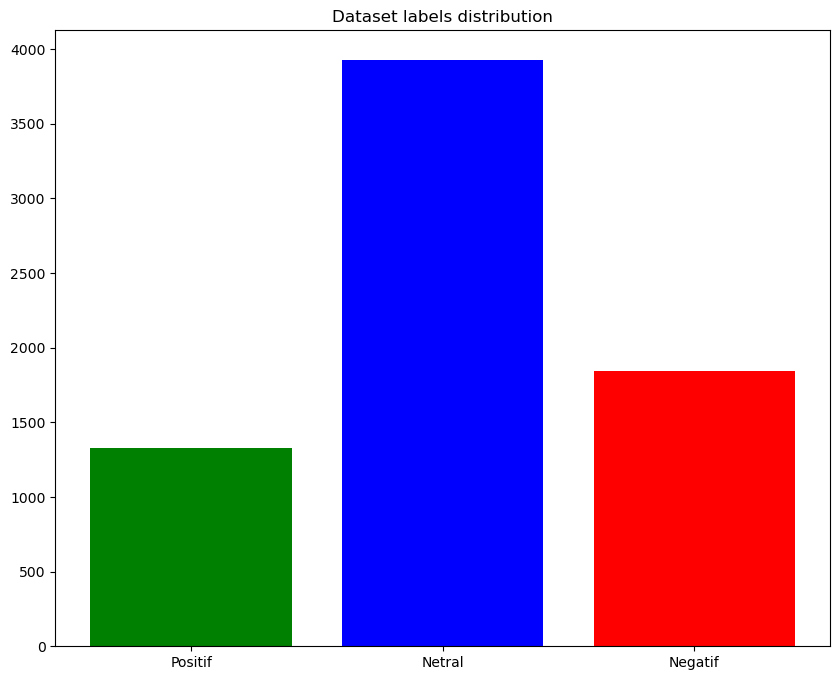

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

label_cnt = Counter(df['label'])
plt.figure(figsize=(10,8))
plt.bar(label_cnt.keys(), label_cnt.values(), color = ["green", "blue", "red"])
plt.title("Dataset labels distribution")

# DATA SAMPLING

In [7]:
X = df.drop(['label'], axis=1)
y = df['label']

In [8]:
X=df
Y=df['label']

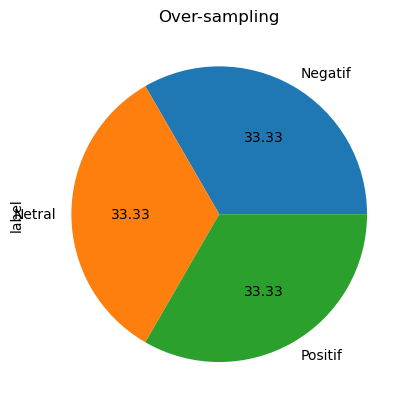

In [9]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, Y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [10]:
# Class distribution
y_res.value_counts()

Negatif    3929
Netral     3929
Positif    3929
Name: label, dtype: int64

In [11]:
df = X_res

# PEMBOBOTAN

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['fulltext'].values.astype('U'))
bow_transformer.vocabulary_

{'halaman': 3310,
 'obrol': 6550,
 'chatgpt': 1524,
 'openai': 6656,
 'tidak': 9543,
 'cetak': 1487,
 'dengan': 2068,
 'benar': 924,
 'di': 2137,
 'firefox': 2821,
 'jadi': 3910,
 'saya': 8232,
 'buat': 1257,
 'stylesheet': 9017,
 'kecil': 4468,
 'untuk': 9968,
 'ekstensi': 2470,
 'stylus': 9018,
 'jangan': 3960,
 'ragu': 7570,
 'kolaborasi': 4680,
 'lalu': 4942,
 'github': 3139,
 'snapchat': 8769,
 'rilis': 7885,
 'chatbot': 1518,
 'ai': 174,
 'nya': 6522,
 'sendiri': 8426,
 'yang': 10526,
 'dukung': 2350,
 'oleh': 6609,
 'ide': 3602,
 'besar': 973,
 'adalah': 74,
 'selain': 8372,
 'bicara': 1003,
 'teman': 9335,
 'dan': 1909,
 'keluarga': 4497,
 'kita': 4635,
 'tiap': 9537,
 'hari': 3351,
 'juga': 4263,
 'akan': 238,
 'guru': 3270,
 'pandu': 6809,
 'evan': 2678,
 'dunne': 2363,
 'dari': 1940,
 'grup': 3240,
 'akar': 240,
 'rumput': 8029,
 'uk': 9896,
 'hitung': 3475,
 'at': 656,
 'school': 8256,
 'compatsch': 1736,
 'didik': 2156,
 'gai': 2976,
 'ajar': 229,
 'risiko': 7902,
 'perlu'

In [13]:
tokens = bow_transformer.get_feature_names_out()
print(tokens)

['aa' 'aaa' 'aaagh' ... 'zyk' 'zz' 'zzullerr']


In [14]:
text_bow = bow_transformer.transform(df['fulltext'].values.astype('U'))
print(text_bow)

  (0, 924)	1
  (0, 1257)	1
  (0, 1487)	1
  (0, 1524)	1
  (0, 2068)	1
  (0, 2137)	1
  (0, 2470)	1
  (0, 2821)	1
  (0, 3139)	1
  (0, 3310)	1
  (0, 3910)	1
  (0, 3960)	1
  (0, 4468)	1
  (0, 4680)	1
  (0, 4942)	1
  (0, 6550)	1
  (0, 6656)	1
  (0, 7570)	1
  (0, 8232)	1
  (0, 9017)	1
  (0, 9018)	1
  (0, 9543)	1
  (0, 9968)	2
  (1, 74)	1
  (1, 174)	2
  :	:
  (11784, 4031)	1
  (11784, 4940)	1
  (11784, 5054)	1
  (11784, 5305)	1
  (11784, 5786)	1
  (11784, 6134)	1
  (11784, 6883)	1
  (11784, 7055)	1
  (11784, 7341)	1
  (11784, 8232)	1
  (11784, 9314)	1
  (11784, 10526)	1
  (11785, 1472)	1
  (11785, 1524)	1
  (11785, 3157)	1
  (11785, 4421)	1
  (11785, 7274)	1
  (11785, 9381)	1
  (11785, 9968)	1
  (11786, 74)	1
  (11786, 1524)	1
  (11786, 2129)	1
  (11786, 2286)	1
  (11786, 6680)	1
  (11786, 9968)	1


In [15]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(11787, 10651)

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)

print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 9968)	0.16387689946557937
  (0, 9543)	0.08895937084849688
  (0, 9018)	0.32856219062184144
  (0, 9017)	0.32856219062184144
  (0, 8232)	0.0841990748959821
  (0, 7570)	0.25073689896250795
  (0, 6656)	0.1385003040429343
  (0, 6550)	0.18598497180033682
  (0, 4942)	0.1628314505186264
  (0, 4680)	0.2671229392860368
  (0, 4468)	0.23594079474713472
  (0, 3960)	0.19479624115065394
  (0, 3910)	0.12161915739594849
  (0, 3310)	0.21599610665979957
  (0, 3139)	0.2613665486017214
  (0, 2821)	0.32856219062184144
  (0, 2470)	0.24257179324191178
  (0, 2137)	0.10275998038983179
  (0, 2068)	0.09331732588644143
  (0, 1524)	0.03591300618965784
  (0, 1487)	0.28964954479217475
  (0, 1257)	0.11700100449239913
  (0, 924)	0.13933769095560286
  (1, 10526)	0.06812577281598516
  (1, 9537)	0.3599701250179358
  :	:
  (11784, 3360)	0.17520713704412033
  (11784, 3309)	0.1598681388451012
  (11784, 2068)	0.10860832297515632
  (11784, 1909)	0.09181591623035222
  (11784, 1898)	0.13415816971743943
  

# SPLIT DATA

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_res,test_size=0.2, random_state=35)

In [18]:
# Menampilkan jumlah data training dan jumlah data testing
print('x_train: ', len(x_train))
print('x_test: ', len(x_test))
print('y_train: ', len(y_train))
print('y_test: ', len(y_test))

Banyaknya x_train :  9429
Banyaknya x_test :  2358
Banyaknya y_train :  9429
Banyaknya y_test :  2358


# NAIVE BAYES

In [19]:
from sklearn.naive_bayes import MultinomialNB

modelnb = MultinomialNB().fit(x_train,y_train)

In [20]:
prediction = modelnb.predict(x_test)

predict = pd.Series(prediction)

print(predict.to_string())

0        Netral
1       Positif
2        Netral
3       Positif
4       Negatif
5       Negatif
6       Negatif
7       Negatif
8       Negatif
9       Positif
10      Negatif
11      Negatif
12       Netral
13      Positif
14       Netral
15       Netral
16       Netral
17      Negatif
18       Netral
19      Negatif
20      Positif
21      Negatif
22      Positif
23      Positif
24      Positif
25      Negatif
26      Positif
27      Positif
28      Negatif
29      Positif
30      Negatif
31      Positif
32      Positif
33      Negatif
34      Negatif
35      Negatif
36       Netral
37      Negatif
38      Positif
39      Positif
40      Positif
41      Positif
42       Netral
43      Negatif
44      Negatif
45       Netral
46      Positif
47       Netral
48      Positif
49      Negatif
50      Negatif
51       Netral
52      Positif
53       Netral
54      Positif
55      Negatif
56      Positif
57       Netral
58      Positif
59      Negatif
60      Positif
61      Positif
62      

In [21]:
true_label = pd.Series(y_test)
print(true_label.to_string())

4890      Netral
2326     Positif
3902      Netral
9047     Negatif
612       Netral
5457      Netral
2545     Negatif
590      Negatif
1924     Negatif
8131     Negatif
7617     Negatif
101       Netral
1582     Positif
8198     Negatif
3163      Netral
4312      Netral
6072     Negatif
173      Negatif
6172      Netral
11779    Positif
5907     Positif
7750     Negatif
5874      Netral
7227     Negatif
10690    Positif
8310     Negatif
5103     Positif
9200     Positif
3494     Negatif
7599     Negatif
10986    Positif
10778    Positif
4457      Netral
7628     Negatif
8787     Negatif
589      Negatif
3801      Netral
2725     Negatif
10967    Positif
10627    Positif
9864     Positif
6318     Positif
4546      Netral
7848     Negatif
1934      Netral
918       Netral
4346      Netral
6254      Netral
5431     Positif
6605      Netral
11003    Positif
3550     Negatif
1148      Netral
5847      Netral
1284     Positif
5189     Positif
9733     Positif
3087      Netral
2485     Posit

# CONFUSION MATRIX

In [22]:
from time import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from pandas import DataFrame

t = time()
y_pred = modelnb.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

scorenb = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % scorenb)

print(metrics.classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif']))

columns = ['Negatif', 'Netral', 'Positif']
cm_nb = confusion_matrix(y_test, y_pred)
df_nb = DataFrame(cm_nb, index=columns, columns=columns)

test time:  0.133s
accuracy:   0.650
              precision    recall  f1-score   support

     Negatif       0.64      0.76      0.70       780
      Netral       0.68      0.37      0.48       788
     Positif       0.64      0.82      0.72       790

    accuracy                           0.65      2358
   macro avg       0.66      0.65      0.63      2358
weighted avg       0.66      0.65      0.63      2358



Text(50.722222222222214, 0.5, 'Label aktual')

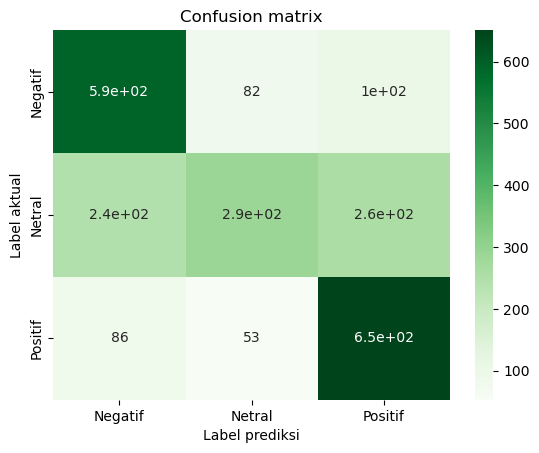

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay

ax = sn.heatmap(df_nb, cmap='Greens', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label aktual')

# CROSS VALIDATION

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelnb, x_train,y_train, cv=10)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 10 folds
print(scores.mean())

[0.62036055 0.63838812 0.62460233 0.62990456 0.65641569 0.63414634
 0.6426299  0.63520679 0.63202545 0.61252654]
0.6326206284771237


# SUPPORT VECTOR MACHINE

In [25]:
# klasifikasi svm
from sklearn.svm import LinearSVC

# model_svm
modelsvm = LinearSVC(max_iter=10000).fit(x_train,y_train)
modelsvm.fit(x_train,y_train)
predsvm = modelsvm.predict(x_test)
predict = pd.Series(predsvm)
print(predict.to_string())

0       Negatif
1       Positif
2        Netral
3       Negatif
4        Netral
5       Negatif
6       Negatif
7       Negatif
8        Netral
9       Positif
10      Negatif
11      Negatif
12      Positif
13      Negatif
14       Netral
15      Positif
16       Netral
17      Negatif
18       Netral
19      Positif
20      Positif
21      Negatif
22      Negatif
23      Positif
24      Positif
25      Negatif
26       Netral
27      Positif
28      Negatif
29      Positif
30      Positif
31      Positif
32      Positif
33      Negatif
34      Negatif
35      Negatif
36       Netral
37       Netral
38      Positif
39       Netral
40      Positif
41      Positif
42       Netral
43      Negatif
44      Negatif
45       Netral
46      Positif
47       Netral
48      Positif
49       Netral
50      Positif
51       Netral
52       Netral
53       Netral
54      Positif
55      Positif
56      Positif
57       Netral
58      Positif
59      Negatif
60      Positif
61      Positif
62      

In [26]:
true_label = pd.Series(y_test)
print(true_label.to_string())

4890      Netral
2326     Positif
3902      Netral
9047     Negatif
612       Netral
5457      Netral
2545     Negatif
590      Negatif
1924     Negatif
8131     Negatif
7617     Negatif
101       Netral
1582     Positif
8198     Negatif
3163      Netral
4312      Netral
6072     Negatif
173      Negatif
6172      Netral
11779    Positif
5907     Positif
7750     Negatif
5874      Netral
7227     Negatif
10690    Positif
8310     Negatif
5103     Positif
9200     Positif
3494     Negatif
7599     Negatif
10986    Positif
10778    Positif
4457      Netral
7628     Negatif
8787     Negatif
589      Negatif
3801      Netral
2725     Negatif
10967    Positif
10627    Positif
9864     Positif
6318     Positif
4546      Netral
7848     Negatif
1934      Netral
918       Netral
4346      Netral
6254      Netral
5431     Positif
6605      Netral
11003    Positif
3550     Negatif
1148      Netral
5847      Netral
1284     Positif
5189     Positif
9733     Positif
3087      Netral
2485     Posit

# CONFUSION MATRIX

In [27]:
from time import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from pandas import DataFrame

t = time()
y_pred = modelsvm.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

scoresvm = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % scoresvm)

print(metrics.classification_report(y_test, y_pred, target_names=['negatif', 'netral', 'positif']))

columns = ['negatif','netral','positif']
cm_svm = confusion_matrix(y_test, y_pred)
df_svm = DataFrame(cm_svm, index=columns, columns=columns)

test time:  0.197s
accuracy:   0.743
              precision    recall  f1-score   support

     negatif       0.75      0.82      0.78       780
      netral       0.73      0.51      0.60       788
     positif       0.74      0.90      0.82       790

    accuracy                           0.74      2358
   macro avg       0.74      0.74      0.73      2358
weighted avg       0.74      0.74      0.73      2358



Text(50.722222222222214, 0.5, 'Label aktual')

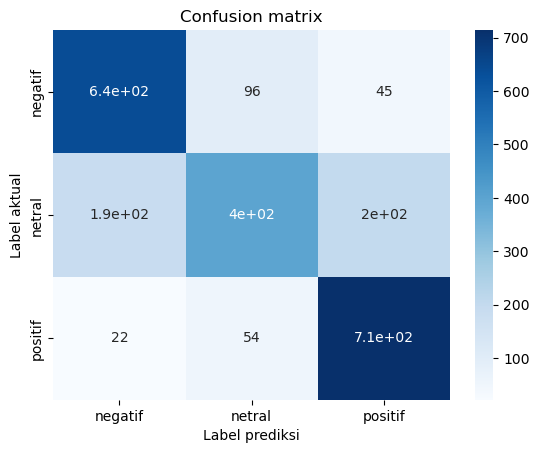

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay

ax = sn.heatmap(df_svm, cmap='Blues', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label aktual')

# CROSS VALIDATION

In [29]:
from sklearn.model_selection import cross_val_score

scoressvm = cross_val_score(modelsvm, x_train,y_train, cv=10)

# Print the accuracy of each fold:
print(scoressvm)

# Print the mean accuracy of all 10 folds
print(scoressvm.mean())

[0.75397667 0.72852598 0.74231177 0.73700954 0.74655355 0.74443266
 0.75397667 0.75185578 0.75715801 0.7388535 ]
0.7454654139451946
